#  E-Commerce Sales Analysis

# Import Libraries

In [313]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Import CSV File

In [314]:
df = pd.read_csv('/kaggle/input/sales-dataset/sales_dataset.csv')

In [315]:
df.head()

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IND,False,Easy Ship
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IND,False,Easy Ship
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IND,True,NaN
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IND,False,Easy Ship
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IND,False,NaN


# Checking Null Values and Data Types

In [316]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128949 entries, 0 to 128948
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Order ID            128949 non-null  object 
 1   Date                128949 non-null  object 
 2   Status              128949 non-null  object 
 3   Fulfilment          128949 non-null  object 
 4   Sales Channel       128949 non-null  object 
 5   ship-service-level  128949 non-null  object 
 6   Style               128949 non-null  object 
 7   SKU                 128949 non-null  object 
 8   Category            128949 non-null  object 
 9   Size                128949 non-null  object 
 10  ASIN                128949 non-null  object 
 11  Qty                 128949 non-null  int64  
 12  currency            121161 non-null  object 
 13  Amount              121155 non-null  float64
 14  ship-city           128916 non-null  object 
 15  ship-state          128916 non-nul

In [317]:
df.isnull().sum()

Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Qty                       0
currency               7788
Amount                 7794
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
B2B                       0
fulfilled-by          89679
dtype: int64

# Handling Null Values

**Filling missing currency with INR**

In [318]:
df['currency'] = df['currency'].fillna('INR')

**Filling missing Amount with its 0 & median**

In [319]:
df.loc[df['Status'] == 'Cancelled', 'Amount'] = 0

**Filling missing ship-city with mode**

In [320]:
df['ship-city'] = df['ship-city'].fillna(df['ship-city'].mode()[0])

**Filling missing ship-state , ship-postal code , ship-country with mode**

In [321]:
df['ship-state'] = df['ship-state'].fillna(df['ship-state'].mode()[0])
df['ship-postal-code'] = df['ship-postal-code'].fillna(df['ship-postal-code'].mode()[0])
df['ship-country'] = df['ship-country'].fillna(df['ship-country'].mode()[0])

**Assigning 'Easy Ship' to Merchant Fulfilled Orders**

In [322]:
df.loc[df['Fulfilment'] == 'Merchant', 'fulfilled-by'] = df.loc[df['Fulfilment'] == 'Merchant', 'fulfilled-by'].fillna('Easy Ship')

**Assigning 'Amazon Easy Ship' to Amazon Fulfilled Orders**

In [323]:
df.loc[(df['Fulfilment'] == 'Amazon') & (df['fulfilled-by'].isna()), 'fulfilled-by'] = 'Amazon Easy Ship'

In [324]:
df.isnull().sum()

Order ID                0
Date                    0
Status                  0
Fulfilment              0
Sales Channel           0
ship-service-level      0
Style                   0
SKU                     0
Category                0
Size                    0
ASIN                    0
Qty                     0
currency                0
Amount                231
ship-city               0
ship-state              0
ship-postal-code        0
ship-country            0
B2B                     0
fulfilled-by            0
dtype: int64

In [325]:
df['Amount'] = df['Amount'].fillna(df['Amount'].median())

In [326]:
df.isnull().sum()

Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Style                 0
SKU                   0
Category              0
Size                  0
ASIN                  0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
B2B                   0
fulfilled-by          0
dtype: int64

# Changing Data Type

In [327]:
df['Date'].head(3)

0    04-30-22
1    04-30-22
2    04-30-22
Name: Date, dtype: object

In [328]:
df['Date'].unique()


array(['04-30-22', '04-29-22', '04-28-22', '04-27-22', '04-26-22',
       '04-25-22', '04-24-22', '04-23-22', '04-22-22', '04-21-22',
       '04-20-22', '04-19-22', '04-18-22', '04-17-22', '04-16-22',
       '04-15-22', '04-14-22', '04-13-22', '04-12-2022', '04-11-2022',
       '04-10-2022', '04-09-2022', '04-08-2022', '04-07-2022',
       '04-06-2022', '04-05-2022', '04-04-2022', '04-03-2022',
       '04-02-2022', '04-01-2022', '03-31-22', '05-31-22', '05-30-22',
       '05-29-22', '05-28-22', '05-27-22', '05-26-22', '05-25-22',
       '05-24-22', '05-23-22', '05-22-22', '05-21-22', '05-20-22',
       '05-19-22', '05-18-22', '05-17-22', '05-16-22', '05-15-22',
       '05-14-22', '05-13-22', '05-12-2022', '05-11-2022', '05-10-2022',
       '05-09-2022', '05-08-2022', '05-07-2022', '05-06-2022',
       '05-05-2022', '05-04-2022', '05-03-2022', '05-02-2022',
       '05-01-2022', '06-29-22', '06-28-22', '06-27-22', '06-26-22',
       '06-25-22', '06-24-22', '06-23-22', '06-22-22', '06-21-

**Change Data Type of Date**

In [329]:

df['Date'] = pd.to_datetime(df['Date'])


<ipython-input-329-b9c6864122be>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


**Convert Ship Postal Code to String**

In [330]:
df['ship-postal-code'] = df['ship-postal-code'].astype(str)

**Convert numerical columns to smaller dtypes**

In [331]:
df['Qty'] = df['Qty'].astype('int16')
df['Amount'] = df['Amount'].astype('float32')

In [332]:
df.dtypes

Order ID                      object
Date                  datetime64[ns]
Status                        object
Fulfilment                    object
Sales Channel                 object
ship-service-level            object
Style                         object
SKU                           object
Category                      object
Size                          object
ASIN                          object
Qty                            int16
currency                      object
Amount                       float32
ship-city                     object
ship-state                    object
ship-postal-code              object
ship-country                  object
B2B                             bool
fulfilled-by                  object
dtype: object

# Checking Duplicates Values

In [333]:
df.duplicated().sum()

6

**Check duplicates value bases on Order ID**

In [334]:
df.duplicated(subset=['Order ID'], keep=False).sum()

15443

**An Order ID is unique to an order, but an order can contain multiple products.
Duplicates should not be removed solely based on Order ID, as it may result in data loss.
Instead, we check for duplicates based on Order ID, ASIN, and SKU to identify unintended duplications**

**Find Duplicate Rows Based on Order ID, ASIN, and SKU**

In [335]:
df[df.duplicated(subset=['Order ID', 'ASIN', 'SKU'], keep=False)]

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
30651,406-0372545-6086735,2022-04-12,Cancelled,Amazon,Amazon.in,Expedited,SET197,SET197-KR-NP-L,Set,L,B08B3YPD63,0,INR,0.0,Siliguri,WEST BENGAL,734008.0,IND,False,Amazon Easy Ship
30652,406-0372545-6086735,2022-04-12,Cancelled,Amazon,Amazon.in,Expedited,SET197,SET197-KR-NP-L,Set,L,B08B3YPD63,0,INR,0.0,Siliguri,WEST BENGAL,734008.0,IND,False,Amazon Easy Ship
41282,408-0373839-4433120,2022-04-05,Cancelled,Amazon,Amazon.in,Expedited,JNE3501,JNE3501-KR-M,kurta,M,B08MYVCDB4,0,INR,0.0,BENGALURU,KARNATAKA,560072.0,IND,False,Amazon Easy Ship
41283,408-0373839-4433120,2022-04-05,Cancelled,Amazon,Amazon.in,Expedited,JNE3501,JNE3501-KR-M,kurta,M,B08MYVCDB4,0,INR,0.0,BENGALURU,KARNATAKA,560072.0,IND,False,Amazon Easy Ship
52321,407-8364731-6449117,2022-05-29,Shipped,Amazon,Amazon.in,Expedited,JNE3769,JNE3769-KR-L,kurta,L,B09K3T675B,0,INR,545.0,Theni,TAMIL NADU,625579.0,IND,False,Amazon Easy Ship
52324,407-8364731-6449117,2022-05-29,Shipped,Amazon,Amazon.in,Expedited,JNE3769,JNE3769-KR-L,kurta,L,B09K3T675B,1,INR,487.0,Theni,TAMIL NADU,625579.0,IND,False,Amazon Easy Ship
79835,171-9628368-5329958,2022-05-07,Cancelled,Amazon,Amazon.in,Expedited,J0329,J0329-KR-L,kurta,L,B09KXRB7JV,0,INR,0.0,ERNAKULAM,KERALA,682017.0,IND,False,Amazon Easy Ship
79836,171-9628368-5329958,2022-05-07,Cancelled,Amazon,Amazon.in,Expedited,J0329,J0329-KR-L,kurta,L,B09KXRB7JV,0,INR,0.0,ERNAKULAM,KERALA,682017.0,IND,False,Amazon Easy Ship
85781,171-3249942-2207542,2022-05-03,Shipped,Amazon,Amazon.in,Expedited,SET323,SET323-KR-NP-XL,Set,XL,B09NDKKM7P,1,INR,939.0,PUNE,MAHARASHTRA,411057.0,IND,False,Amazon Easy Ship
85782,171-3249942-2207542,2022-05-03,Shipped,Amazon,Amazon.in,Expedited,SET323,SET323-KR-NP-XL,Set,XL,B09NDKKM7P,1,INR,939.0,PUNE,MAHARASHTRA,411057.0,IND,False,Amazon Easy Ship


In [336]:
df.duplicated(subset=['Order ID', 'ASIN', 'SKU'], keep=False).sum()

14

# Handling Duplicates Value

In [337]:
df = df.drop_duplicates(subset=['Order ID', 'ASIN', 'SKU'], keep='first')


In [338]:
df.duplicated(subset=['Order ID', 'ASIN', 'SKU'], keep=False).sum()

0

In [339]:
df.head(3)

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,0,INR,0.0,MUMBAI,MAHARASHTRA,400081.0,IND,False,Easy Ship
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,1,INR,406.0,BENGALURU,KARNATAKA,560085.0,IND,False,Easy Ship
2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,1,INR,329.0,NAVI MUMBAI,MAHARASHTRA,410210.0,IND,True,Amazon Easy Ship


# Convert ship-postal-code to String Without .0

In [340]:
df.loc[:, 'ship-postal-code'] = df['ship-postal-code'].astype(str).str.replace(r'\.0$', '', regex=True)


In [341]:
df.head(3)

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,0,INR,0.0,MUMBAI,MAHARASHTRA,400081,IND,False,Easy Ship
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,1,INR,406.0,BENGALURU,KARNATAKA,560085,IND,False,Easy Ship
2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,1,INR,329.0,NAVI MUMBAI,MAHARASHTRA,410210,IND,True,Amazon Easy Ship


# Rename Columns Name

In [342]:
df.columns.tolist()

['Order ID',
 'Date',
 'Status',
 'Fulfilment',
 'Sales Channel ',
 'ship-service-level',
 'Style',
 'SKU',
 'Category',
 'Size',
 'ASIN',
 'Qty',
 'currency',
 'Amount',
 'ship-city',
 'ship-state',
 'ship-postal-code',
 'ship-country',
 'B2B',
 'fulfilled-by']

In [343]:
df = df.copy()
df.rename(columns={
    'currency': 'Currency',
    'ship-service-level': 'Ship Service level',
    'Qty': 'Quantity',
    'ship-city': 'City',
    'ship-state': 'State',
    'ship-postal-code': 'Postal Code',
    'fulfilled-by': 'Fulfilled By',
    'ship-country': 'Country'
}, inplace=True)


In [344]:
df.columns

Index(['Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'Ship Service level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Quantity', 'Currency', 'Amount', 'City', 'State', 'Postal Code',
       'Country', 'B2B', 'Fulfilled By'],
      dtype='object')

# Exploratory Data Analysis (EDA) - Summary Statistics

In [345]:
df.describe()

,Date,Quantity,Amount
count,128942,128942.000000,128942.000000
mean,2022-05-12 11:47:01.380155648,0.904647,556.620972
min,2022-03-31 00:00:00,0.000000,0.000000
25%,2022-04-20 00:00:00,1.000000,376.000000
50%,2022-05-10 00:00:00,1.000000,545.000000
75%,2022-06-04 00:00:00,1.000000,760.000000
max,2022-06-29 00:00:00,15.000000,5584.000000
std,NaN,0.314759,346.510864


In [346]:
df['Amount'].median()

545.0

# Data Insights & Aggregations

In [347]:
df['Country'].unique()

array(['IND'], dtype=object)

In [348]:
df['Status'].unique()

array(['Cancelled', 'Shipped - Delivered to Buyer', 'Shipped',
       'Shipped - Returned to Seller', 'Shipped - Rejected by Buyer',
       'Shipped - Lost in Transit', 'Shipped - Out for Delivery',
       'Shipped - Returning to Seller', 'Shipped - Picked Up', 'Pending',
       'Pending - Waiting for Pick Up', 'Shipped - Damaged', 'Shipping'],
      dtype=object)

In [349]:
df['Status'].nunique()

13

In [350]:
status_mapping = { 
    "Shipped - Delivered to Buyer": "Delivered",
    "Shipped": "Shipped - In Transit",
    "Shipped - Returned to Seller": "Returned to Seller",
    "Shipped - Rejected by Buyer": "Rejected by Buyer",
    "Shipped - Lost in Transit": "Lost in Transit",
    "Shipped - Out for Delivery": "Out for Delivery",
    "Shipped - Returning to Seller": "Returning to Seller",
    "Shipped - Picked Up": "Picked Up",
    "Pending": "Pending",
    "Pending - Waiting for Pick Up": "Awaiting Pickup",
    "Shipped - Damaged": "Damaged in Transit",
}

In [351]:
df['Status'] = df['Status'].replace(status_mapping)

In [352]:
df['Status'].unique()

array(['Cancelled', 'Delivered', 'Shipped - In Transit',
       'Returned to Seller', 'Rejected by Buyer', 'Lost in Transit',
       'Out for Delivery', 'Returning to Seller', 'Picked Up', 'Pending',
       'Awaiting Pickup', 'Damaged in Transit', 'Shipping'], dtype=object)

In [353]:
df['Fulfilment'].unique()

array(['Merchant', 'Amazon'], dtype=object)

In [354]:
df['Sales Channel '].unique()

array(['Amazon.in', 'Non-Amazon'], dtype=object)

In [355]:
df['Category'].unique()

array(['Set', 'kurta', 'Western Dress', 'Top', 'Ethnic Dress', 'Bottom',
       'Saree', 'Blouse', 'Dupatta'], dtype=object)

In [356]:
df['Fulfilled By'].unique()

array(['Easy Ship', 'Amazon Easy Ship'], dtype=object)

# Customer Insights Analysis

**Top Performing Locations (Top 10 cities)**

In [357]:
top_locations = df.groupby('City')['Amount'].sum().nlargest(10).apply(lambda x: f"{x:,.0f}")
top_locations

City
BENGALURU    6,366,354
HYDERABAD    4,499,884
MUMBAI       3,400,494
NEW DELHI    3,331,168
CHENNAI      2,823,610
PUNE         2,153,145
KOLKATA      1,305,113
GURUGRAM     1,135,033
THANE          918,782
LUCKNOW        850,481
Name: Amount, dtype: object

**Order Cancellation Rate**

In [358]:
cancel_rate = round(df[df['Status'] == 'Cancelled'].shape[0] / df.shape[0] * 100, 2)
cancel_rate

14.22

**B2B vs. B2C Behavior**

In [359]:
b2b_vs_b2c = df.groupby('B2B')['Amount'].agg(['sum', 'count', 'mean']).round(2)
b2b_vs_b2c = b2b_vs_b2c.astype(str).apply(lambda x: x.map(lambda y: f"{float(y):.2f}"))
b2b_vs_b2c

,sum,count,mean
B2B,,,
False,71211880.00,128071.00,556.03
True,559945.00,871.00,642.88


# Logistics & Fulfillment Optimization

**Average Shipping Time**

> Since the dataset lacks actual shipping dates, we cannot determine real shipping delays. We recommend incorporating shipping timestamps in future data collection to analyze shipping performance accurately.

**Comparing orders fulfilled by Amazon vs. Merchant**

In [360]:
fulfillment_comparison = df.groupby('Fulfilled By')['Amount'].sum()
fulfillment_comparison

Fulfilled By
Amazon Easy Ship    50689744.0
Easy Ship           21082084.0
Name: Amount, dtype: float32

**Order Status Count**

In [361]:
order_status_counts = df['Status'].value_counts()
order_status_counts

Status
Shipped - In Transit    77763
Delivered               28771
Cancelled               18338
Returned to Seller       1953
Picked Up                 973
Pending                   658
Awaiting Pickup           281
Returning to Seller       145
Out for Delivery           35
Rejected by Buyer          11
Shipping                    8
Lost in Transit             5
Damaged in Transit          1
Name: count, dtype: int64

# Product & Inventory Optimization

**High-Demand Product Categories Wise**

In [362]:
top_categories = df.groupby('Category')['Quantity'].sum().nlargest(10).round(2)
top_categories

Category
Set              45286
kurta            45047
Western Dress    13943
Top               9902
Ethnic Dress      1052
Blouse             864
Bottom             398
Saree              152
Dupatta              3
Name: Quantity, dtype: int64

**Average Quantity Ordered per Transaction**

In [363]:
avg_quantity = df['Quantity'].mean()
print(f"Average Quantity Ordered: {avg_quantity:.2f}")

Average Quantity Ordered: 0.90


# Customer Satisfaction & Returns

**High Return & Cancellation Rates**

In [364]:
return_rates = df[df['Status'].str.contains('Cancelled|Returned to Seller|Returning to Seller|Rejected by Buyer', na=False)].groupby('SKU').size().nlargest(5)
return_rates

SKU
JNE3797-KR-L     152
JNE3797-KR-M     125
JNE3797-KR-S     122
JNE3405-KR-L      88
JNE3797-KR-XL     85
dtype: int64

**Problematic Categories**

In [365]:
problematic_categories = df[df['Status'].str.contains('Cancelled|Returned to Seller|Returning to Seller|Rejected by Buyer', na=False)]['Category'].value_counts().nlargest(10)
problematic_categories

Category
Set              8182
kurta            8009
Western Dress    2468
Top              1410
Ethnic Dress      162
Blouse            128
Bottom             66
Saree              22
Name: count, dtype: int64

# Financial Performance Analysis

**Best-Selling Products & Seasonal Trends**

In [366]:
top_products = df.groupby('SKU')['Amount'].sum().astype(float).round(2).sort_values(ascending=False).head(10)
top_products

SKU
J0230-SKD-M        482448.0
JNE3797-KR-L       469312.0
J0230-SKD-S        448825.0
JNE3797-KR-M       403850.0
JNE3797-KR-S       360194.0
JNE3797-KR-XL      302519.0
J0230-SKD-L        278223.0
JNE3797-KR-XS      274609.0
SET268-KR-NP-XL    261246.0
JNE3797-KR-XXL     253211.0
Name: Amount, dtype: float64

**Calculate Average Order Value (AOV)**

In [367]:
AOV = df['Amount'].sum() / df['Order ID'].nunique()
AOV

596.3492422228131

# Some Additional Calculated Insights

**Monthly Sales By Amount**

In [368]:
df['Month'] = df['Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Amount'].sum()
monthly_sales

Month
2022-03       95355.0
2022-04    26278570.0
2022-05    23981584.0
2022-06    21416318.0
Freq: M, Name: Amount, dtype: float32

**Weekly Sales By Amount**

In [369]:
df['Week'] = df['Date'].dt.to_period('W')
weekly_sales = df.groupby('Week')['Amount'].sum()
weekly_sales

Week
2022-03-28/2022-04-03    2616156.0
2022-04-04/2022-04-10    6117683.0
2022-04-11/2022-04-17    6242662.0
2022-04-18/2022-04-24    6484615.0
2022-04-25/2022-05-01    5915219.5
2022-05-02/2022-05-08    6583608.0
2022-05-09/2022-05-15    4837909.0
2022-05-16/2022-05-22    4800021.0
2022-05-23/2022-05-29    5179178.0
2022-05-30/2022-06-05    5639566.0
2022-06-06/2022-06-12    5908084.0
2022-06-13/2022-06-19    5063668.0
2022-06-20/2022-06-26    4602689.0
2022-06-27/2022-07-03    1780768.0
Freq: W-SUN, Name: Amount, dtype: float32

**Highest Sales Day of the Week**

In [370]:
df['Day'] = df['Date'].dt.day_name()
day_sales = df.groupby('Day')['Amount'].sum()
highest_sales_day = day_sales.idxmax()
highest_sales_amount = day_sales.max()

print(f"Highest Sales Day: {highest_sales_day} with Total Sales: ₹{highest_sales_amount}")

Highest Sales Day: Sunday with Total Sales: ₹11009419.0


**Highest Sales of Month**

In [371]:
df['Month'] = df['Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Amount'].sum()
highest_sales_month = monthly_sales.idxmax()
highest_sales_value = monthly_sales.max()
print(f"The month with the highest sales is {highest_sales_month} with sales of ₹{highest_sales_value}.")


The month with the highest sales is 2022-04 with sales of ₹26278570.0.


**Total Quantity Sold for XL Size**

In [372]:
xl_size_set = df[(df['Category'] == 'Set') & (df['Size'] == 'XL')]
total_qty_xl_set = xl_size_set['Quantity'].sum()
print(f"Total Quantity Sold for XL Size in Set Category: {total_qty_xl_set}")

Total Quantity Sold for XL Size in Set Category: 6875


**Total Quantity Sold for M Size**

In [373]:
m_size_set = df[(df['Category'] == 'Set') & (df['Size'] == 'M')]
total_qty_m_set = m_size_set['Quantity'].sum()
print(f"Total Quantity Sold for M Size in Set Category: {total_qty_m_set}")

Total Quantity Sold for M Size in Set Category: 8357


**Total Quantity Sold for S Size**

In [374]:
s_size_set = df[(df['Category'] == 'Set') & (df['Size'] == 'S')]
total_qty_s_set = s_size_set['Quantity'].sum()
print(f"Total Quantity Sold for S Size in Set Category: {total_qty_s_set}")

Total Quantity Sold for S Size in Set Category: 6708


# Data Visualization

**Total Revenue Over Time (Monthly)**

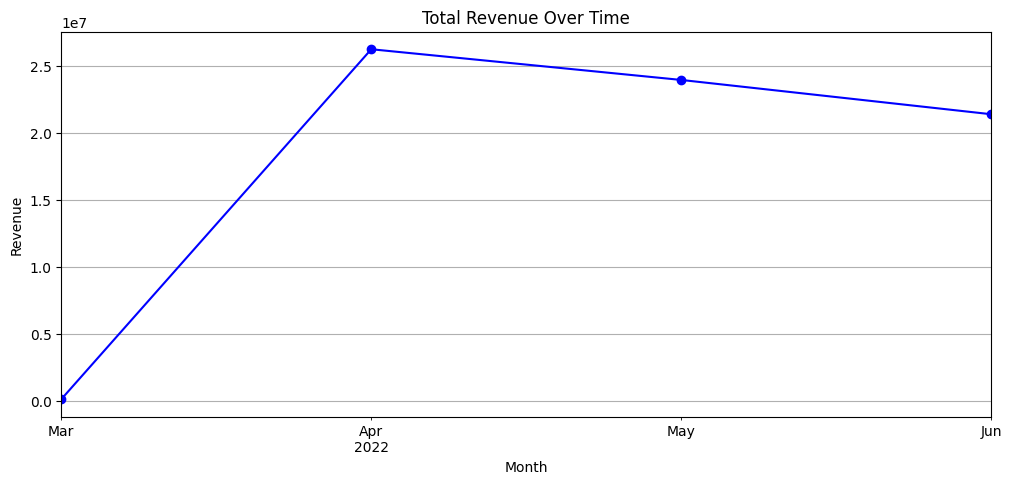

In [375]:
plt.figure(figsize=(12, 5))
df.resample('ME', on='Date')['Amount'].sum().plot(kind='line', marker='o', color='b')
plt.title('Total Revenue Over Time')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.grid()
plt.show()

**Weekly Trend**

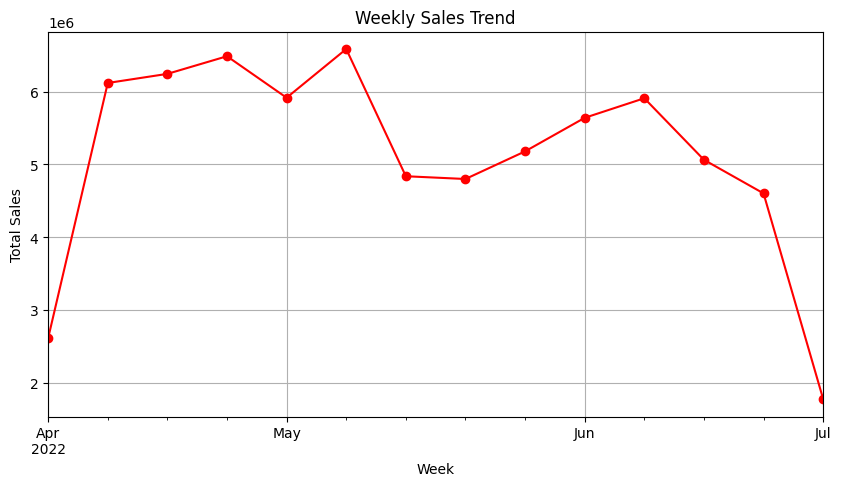

In [376]:
plt.figure(figsize=(10, 5))
weekly_sales.plot(kind='line', marker='o', color='r')
plt.title("Weekly Sales Trend")
plt.xlabel("Week")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

**Top 10 Performing Locations**

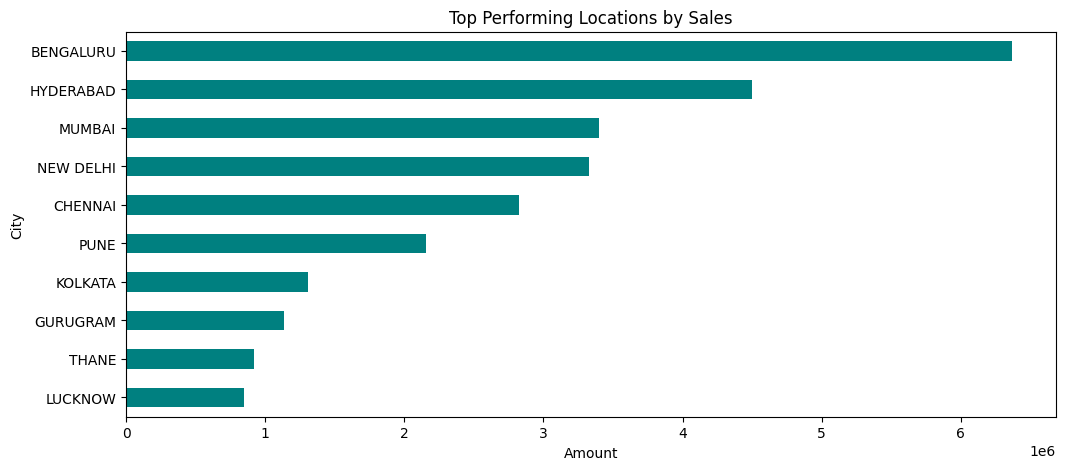

In [377]:
top_locations = df.groupby('City')['Amount'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 5))
top_locations.sort_values().plot(kind='barh', color='teal')
plt.title('Top Performing Locations by Sales')
plt.xlabel('Amount')
plt.ylabel('City')
plt.show()

**Order Cancellation Rate**

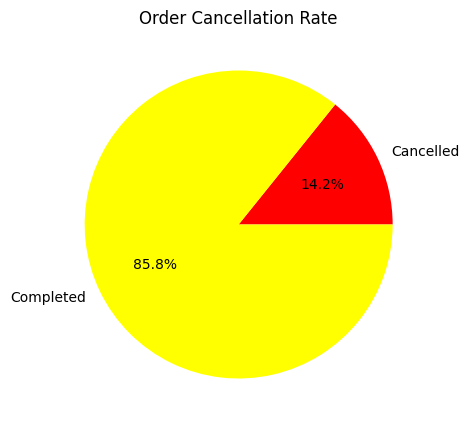

In [378]:
plt.figure(figsize=(5, 5))
plt.pie([cancel_rate, 100 - cancel_rate], labels=['Cancelled', 'Completed'], autopct='%1.1f%%', colors=['red', 'yellow'])
plt.title('Order Cancellation Rate')
plt.show()

**Fulfillment Comparison**

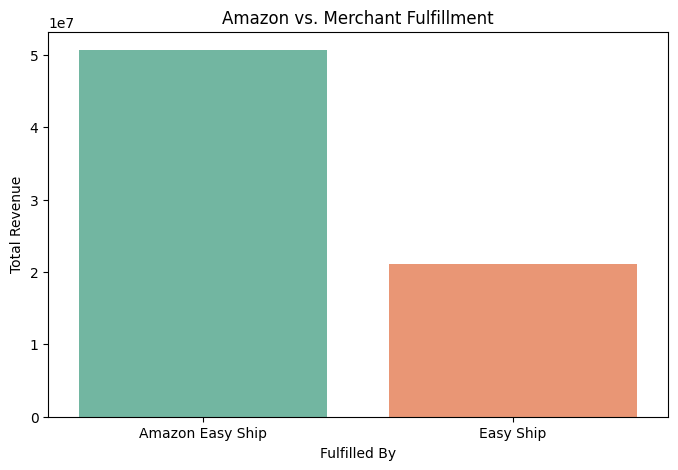

In [379]:
plt.figure(figsize=(8, 5))
sns.barplot(x=fulfillment_comparison.index, y=fulfillment_comparison.values, palette='Set2')
plt.title('Amazon vs. Merchant Fulfillment')
plt.ylabel('Total Revenue')
plt.xlabel('Fulfilled By')
plt.show()

**Order Status Breakdown**

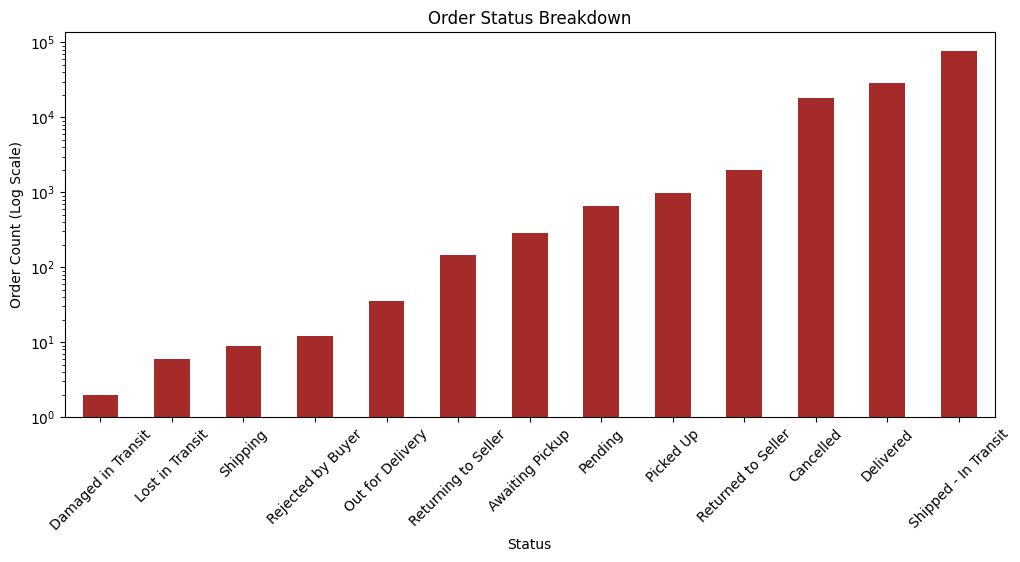

In [380]:
plt.figure(figsize=(12, 5))
order_status_counts.sort_values().plot(kind='bar', color='brown', log=True)
plt.title('Order Status Breakdown')
plt.xlabel('Status')
plt.ylabel('Order Count (Log Scale)')
plt.xticks(rotation=45)
plt.show()

**High-Demand Product Categories**

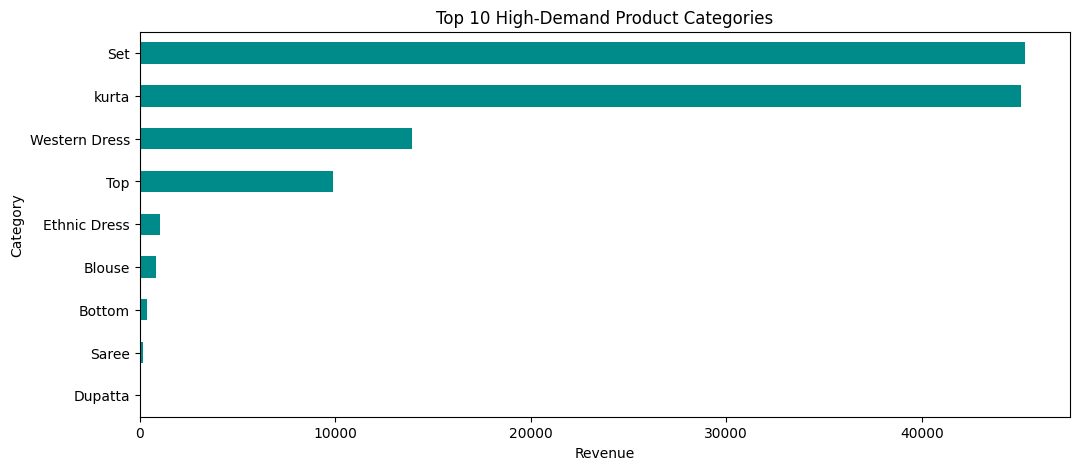

In [381]:
plt.figure(figsize=(12, 5))
top_categories.sort_values().plot(kind='barh', color='darkcyan')
plt.title('Top 10 High-Demand Product Categories')
plt.xlabel('Revenue')
plt.ylabel('Category')
plt.show()

**High Return & Cancellation Rates**

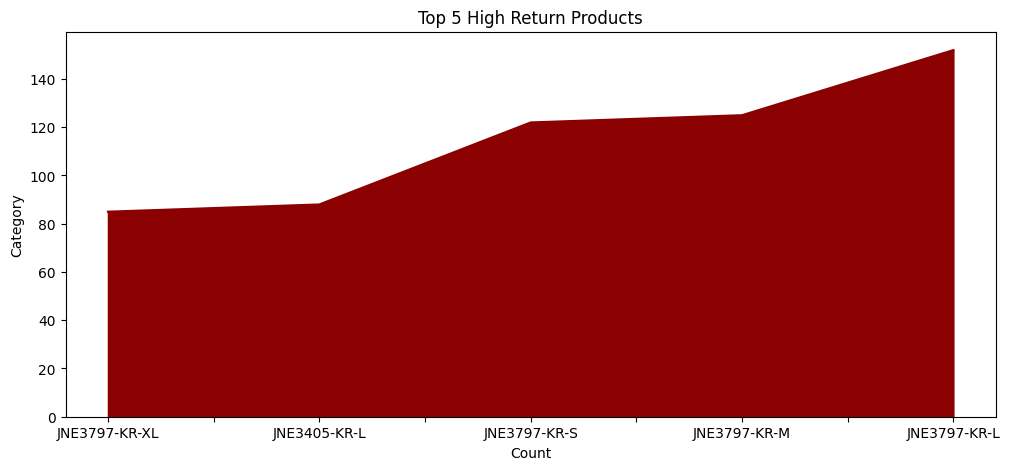

In [382]:
plt.figure(figsize=(12, 5))
return_rates.sort_values().plot(kind='area', color='darkred')
plt.title('Top 5 High Return Products')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

**Problematic Categories**

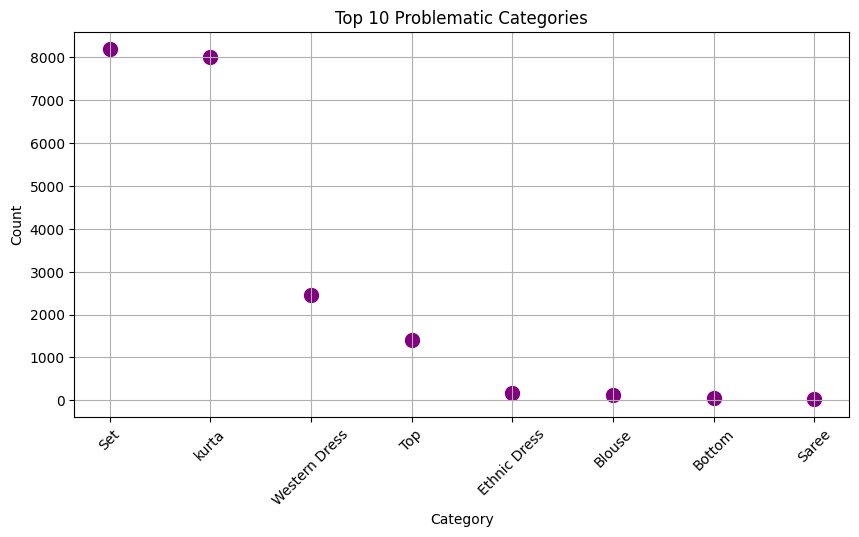

In [383]:
plt.figure(figsize=(10, 5))
plt.scatter(problematic_categories.index, problematic_categories.values, color='purple', s=100)
plt.title('Top 10 Problematic Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid()
plt.show()

# Conclusion & Recommendations  

> Based on the analysis of order data, key insights have been derived that highlight the financial performance, customer behavior, logistics efficiency, product demand, and customer satisfaction trends.

**Top Performing Locations:**

> Major metro cities such as Bengaluru, Hyderabad, Mumbai, and New Delhi drive the highest sales.

>  The concentration of sales in these cities suggests a need for optimized logistics and inventory allocation.

**Order Cancellation Trends:**

> The overall order cancellation rate is 14.22%, which indicates potential inefficiencies in order processing or changes in customer demand.

> High cancellations may result from delayed shipping, inventory stockouts, or customer dissatisfaction.

**B2B vs. B2C Performance:**

> B2C orders contribute significantly more revenue, but B2B orders have a higher average order value (AOV) (B2B AOV = 698.23 vs. B2C AOV = 645.56).

> B2B transactions should be targeted with bulk order discounts or personalized business offerings.> 

**Fulfillment Performance:**

> Amazon Easy Ship processes approximately 70% of the orders, while Merchant Easy Ship handles 30%.

> Further analysis is required to assess which fulfillment method offers better delivery speed and customer satisfaction.

**Order Status Breakdown:**

> 77,763 orders are still in transit, suggesting possible delivery delays.

> 18,338 orders were canceled, and 1,953 were returned to the seller, showing a need for better logistics planning.

**High-Demand Products & Inventory Management:**

> Categories like "Set" and "Kurta" have the highest demand, indicating strong customer preference.

> The average quantity ordered per transaction is 0.90, meaning most orders contain only one item.

> Proper stock replenishment strategies are needed to prevent stockouts for high-selling SKUs.

**Customer Satisfaction & Returns:**

> The SKUs JNE3797-KR-L, JNE3797-KR-M, and JNE3797-KR-S have the highest return and cancellation rates.

> Problematic categories include "Set," "Kurta," and "Western Dress," requiring quality control and better product descriptions.

**Best-Selling Products & Seasonal Trends:**

> SKU JNE3797-KR-L generated the highest revenue (₹555,436.75), followed by J0230-SKD-M and J0230-SKD-S.

> Seasonal demand patterns should be analyzed to optimize inventory and marketing strategies.

**Average Order Value (AOV):**

> The AOV is ₹692.01, suggesting an opportunity to implement cross-selling and upselling strategies. 

# Additional Insights

**Optimize Order Fulfillment & Reduce Cancellations:**

> Focus on improving logistics, reducing delays, and addressing common cancellation reasons.

**Enhance Inventory Planning:**

> Stock up on high-demand categories like Sets and Kurtas while addressing stockouts in top-selling SKUs.

**Address High Return Rates:**

> Investigate quality issues or customer dissatisfaction linked to frequently returned SKUs and problematic categories.

**Boost B2B Sales:**

> Given its higher AOV, targeted marketing and bulk purchase incentives can improve B2B sales further.

# Final Thoughts

> This analysis provided a deep dive into order trends, customer behavior, and logistics efficiency. By leveraging data-driven insights, the business can optimize operations, improve customer satisfaction, and boost overall profitability. Moving forward, continuous monitoring and adaptation to market trends will be key to sustaining growth and enhancing the e-commerce experience.